In [4]:
import pandas as pd

In [9]:
df=pd.read_csv(r"C:\Users\Rutuja Vartak\Downloads\water.csv")
df.head()

,temperature,dissolved oxygen,pH,conductivity,BCOD,nitrate,faecal coliform,total coliform,Unnamed: 8,Unnamed: 9
0,7.5,9.95,7.85,134.5,0.15,0.255,22.5,180.0,NaN,NaN
1,11.0,9.65,7.70,77.0,0.45,0.200,62.5,410.0,NaN,NaN
2,7.5,9.90,7.65,101.5,0.55,0.100,26.0,200.0,NaN,NaN
3,8.5,9.65,7.55,148.0,0.35,0.250,97.5,600.0,NaN,NaN
4,10.0,9.55,7.80,106.0,0.25,0.150,47.5,380.0,NaN,NaN


In [3]:
df.tail()

,temperature,dissolved oxygen,pH,conductivity,BCOD,nitrate,faecal coliform,total coliform,Unnamed: 8,Unnamed: 9
76,23.0,6.10,7.55,344.0,3.10,2.05,3600.0,7150.0,NaN,NaN
77,20.5,4.45,7.40,598.0,11.60,1.11,52000.0,138500.0,NaN,NaN
78,21.5,3.50,7.65,761.0,12.70,1.75,11100.0,28650.0,NaN,NaN
79,22.0,7.80,7.65,249.0,1.15,0.80,511.5,1445.0,NaN,NaN
80,23.0,7.65,7.70,260.0,1.50,2.25,490.5,1260.0,NaN,NaN


In [10]:
df.drop('Unnamed: 8',axis='columns',inplace=True)

In [11]:
df.drop('Unnamed: 9',axis='columns',inplace=True)

In [12]:
df.head()

,temperature,dissolved oxygen,pH,conductivity,BCOD,nitrate,faecal coliform,total coliform
0,7.5,9.95,7.85,134.5,0.15,0.255,22.5,180.0
1,11.0,9.65,7.70,77.0,0.45,0.200,62.5,410.0
2,7.5,9.90,7.65,101.5,0.55,0.100,26.0,200.0
3,8.5,9.65,7.55,148.0,0.35,0.250,97.5,600.0
4,10.0,9.55,7.80,106.0,0.25,0.150,47.5,380.0


In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [16]:
Input=[('sclae',StandardScaler()),('Polynomial',PolynomialFeatures(degree=2)),('mode',LinearRegression())]

In [17]:
pipe=Pipeline(Input)

In [18]:
pipe.fit(df[['temperature','dissolved oxygen','conductivity','BCOD','nitrate','faecal coliform','total coliform']],df['pH'])

Pipeline(steps=[('sclae', StandardScaler()),
                ('Polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

In [19]:
yhat=pipe.predict(df[['temperature','dissolved oxygen','conductivity','BCOD','nitrate','faecal coliform','total coliform']])

In [20]:
yhat

array([7.87573242, 7.72290039, 7.73681641, 7.85424805, 7.85839844,
       7.54711914, 7.75512695, 7.765625  , 7.80102539, 7.88061523,
       8.07055664, 7.90380859, 7.85888672, 7.71240234, 7.69677734,
       7.75854492, 7.75195312, 7.74462891, 7.96728516, 7.96875   ,
       7.91992188, 8.01416016, 7.78979492, 8.41601562, 8.5859375 ,
       7.66137695, 7.75732422, 7.76977539, 7.6015625 , 7.45800781,
       7.57885742, 7.58349609, 7.52954102, 7.58325195, 7.92895508,
       7.53442383, 7.57641602, 7.64575195, 7.69506836, 7.81689453,
       8.34716797, 8.22290039, 7.62768555, 7.75732422, 7.56054688,
       7.88916016, 7.93652344, 7.70874023, 7.82373047, 8.01586914,
       7.99047852, 7.86328125, 7.73266602, 8.67114258, 8.20556641,
       8.1496582 , 7.73193359, 7.76196289, 8.02978516, 7.97900391,
       7.3347168 , 7.69091797, 7.46582031, 6.77783203, 7.88500977,
       7.27807617, 7.56811523, 7.26416016, 7.68041992, 7.32763672,
       7.66113281, 7.88134766, 7.69287109, 8.08129883, 7.85229

In [21]:
pipe.intercept_

AttributeError: 'Pipeline' object has no attribute 'intercept_'

In [22]:
yhat.intercept_

AttributeError: 'numpy.ndarray' object has no attribute 'intercept_'

C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Rutuja Vartak\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pH', ylabel='Density'>

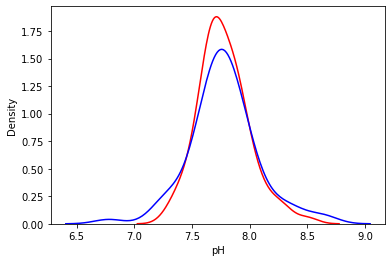

In [23]:
import seaborn as sns

ax1= sns.distplot(df['pH'],hist=False,color='r',label="actual value")
sns.distplot(yhat, hist=False, color='b',label="Fitted Values",ax=ax1)

In [24]:
df.corr() #pH is being predicted. clearly visible that 'dissolved oxygen' and 'BCOD' is influencing pH the most

,temperature,dissolved oxygen,pH,conductivity,BCOD,nitrate,faecal coliform,total coliform
temperature,1.000000,-0.581304,-0.228084,-0.356913,0.369034,0.351529,0.215403,0.227615
dissolved oxygen,-0.581304,1.000000,0.527503,-0.204633,-0.838554,-0.394366,-0.370665,-0.381674
pH,-0.228084,0.527503,1.000000,0.102397,-0.451255,-0.285431,-0.240923,-0.257665
conductivity,-0.356913,-0.204633,0.102397,1.000000,0.201083,0.061895,0.061737,0.058369
BCOD,0.369034,-0.838554,-0.451255,0.201083,1.000000,0.325552,0.559099,0.561209
nitrate,0.351529,-0.394366,-0.285431,0.061895,0.325552,1.000000,0.112182,0.122953
faecal coliform,0.215403,-0.370665,-0.240923,0.061737,0.559099,0.112182,1.000000,0.991509
total coliform,0.227615,-0.381674,-0.257665,0.058369,0.561209,0.122953,0.991509,1.000000


In [25]:
df_test=df[['dissolved oxygen','BCOD','pH']]

In [26]:
df_grp=df_test.groupby(['dissolved oxygen','BCOD'],as_index=False).mean()
df_grp

,dissolved oxygen,BCOD,pH
0,0.00,62.00,7.45
1,0.00,84.00,7.30
2,1.60,31.50,7.50
3,2.95,8.00,7.55
4,3.50,12.70,7.65
...,...,...,...
71,9.85,0.10,8.20
72,9.85,0.25,7.70
73,9.90,0.55,7.65
74,9.95,0.15,7.85


In [27]:
df_pivot=df_grp.pivot(index='dissolved oxygen',columns='BCOD')

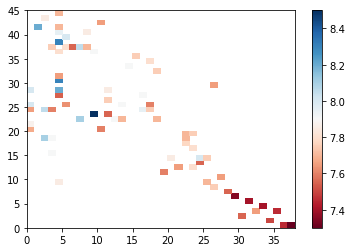

In [28]:
import matplotlib.pyplot as plt

plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#heatmap is not showing clearly the points

<AxesSubplot:xlabel='dissolved oxygen', ylabel='pH'>

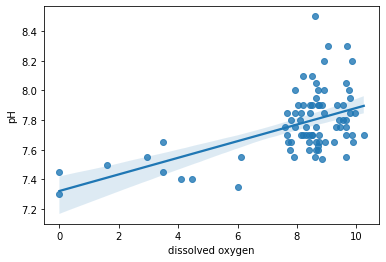

In [29]:
sns.regplot(x='dissolved oxygen',y='pH', data=df) #since heatmap is not clear, we are using regplot

<AxesSubplot:xlabel='BCOD', ylabel='pH'>

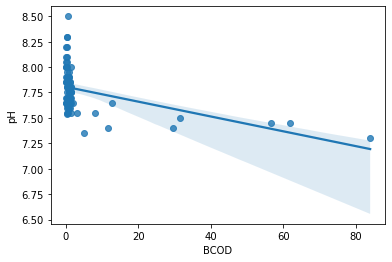

In [30]:
sns.regplot(x='BCOD',y='pH',data=df)

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(df['pH'],yhat)

0.06992258621262916

<AxesSubplot:xlabel='BCOD', ylabel='pH'>

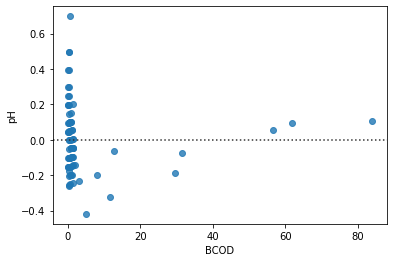

In [32]:
sns.residplot(x='BCOD',y='pH',data=df)

<AxesSubplot:xlabel='dissolved oxygen', ylabel='pH'>

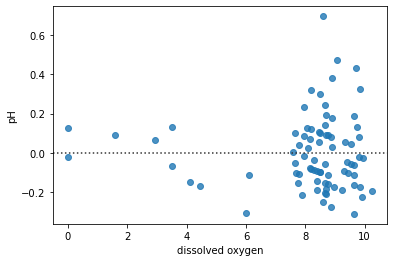

In [33]:
sns.residplot(x='dissolved oxygen',y='pH',data=df)

In [34]:
scale=pipe.named_steps['sclae']

In [35]:
scale

StandardScaler()

In [36]:
scale.best_estimator.coef_

AttributeError: 'StandardScaler' object has no attribute 'best_estimator'

In [ ]:
pipe.score(df[['temperature','dissolved oxygen','conductivity','BCOD','nitrate','faecal coliform','total coliform']],df['pH'])

In [37]:
pipe.get_params()

{'memory': None,
 'steps': [('sclae', StandardScaler()),
  ('Polynomial', PolynomialFeatures()),
  ('mode', LinearRegression())],
 'verbose': False,
 'sclae': StandardScaler(),
 'Polynomial': PolynomialFeatures(),
 'mode': LinearRegression(),
 'sclae__copy': True,
 'sclae__with_mean': True,
 'sclae__with_std': True,
 'Polynomial__degree': 2,
 'Polynomial__include_bias': True,
 'Polynomial__interaction_only': False,
 'Polynomial__order': 'C',
 'mode__copy_X': True,
 'mode__fit_intercept': True,
 'mode__n_jobs': None,
 'mode__normalize': 'deprecated',
 'mode__positive': False}

In [38]:
df.describe()

,temperature,dissolved oxygen,pH,conductivity,BCOD,nitrate,faecal coliform,total coliform
count,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,8.100000e+01
mean,16.071605,8.080247,7.774259,590.665432,4.308025,1.126049,15146.684568,3.441897e+04
std,5.225646,2.074935,0.220285,571.581527,13.643424,1.233695,97158.676076,2.060708e+05
min,7.500000,0.000000,7.300000,77.000000,0.000000,0.100000,2.000000,2.000000e+00
25%,11.000000,7.950000,7.650000,214.000000,0.250000,0.350000,22.000000,1.795000e+02
50%,16.500000,8.600000,7.750000,275.500000,0.600000,0.700000,55.900000,4.100000e+02
75%,20.500000,9.250000,7.900000,1012.500000,1.200000,1.300000,300.000000,8.470000e+02
max,26.000000,10.250000,8.500000,2630.000000,84.000000,6.350000,863500.000000,1.789500e+06


In [39]:
pr=PolynomialFeatures(degree=2)

In [40]:
pr.fit_transform(df[['temperature','dissolved oxygen','conductivity','BCOD','faecal coliform','total coliform']],df[['pH']])

array([[1.0000000e+00, 7.5000000e+00, 9.9500000e+00, ..., 5.0625000e+02,
        4.0500000e+03, 3.2400000e+04],
       [1.0000000e+00, 1.1000000e+01, 9.6500000e+00, ..., 3.9062500e+03,
        2.5625000e+04, 1.6810000e+05],
       [1.0000000e+00, 7.5000000e+00, 9.9000000e+00, ..., 6.7600000e+02,
        5.2000000e+03, 4.0000000e+04],
       ...,
       [1.0000000e+00, 2.1500000e+01, 3.5000000e+00, ..., 1.2321000e+08,
        3.1801500e+08, 8.2082250e+08],
       [1.0000000e+00, 2.2000000e+01, 7.8000000e+00, ..., 2.6163225e+05,
        7.3911750e+05, 2.0880250e+06],
       [1.0000000e+00, 2.3000000e+01, 7.6500000e+00, ..., 2.4059025e+05,
        6.1803000e+05, 1.5876000e+06]])

In [41]:
pr.coef_

AttributeError: 'PolynomialFeatures' object has no attribute 'coef_'

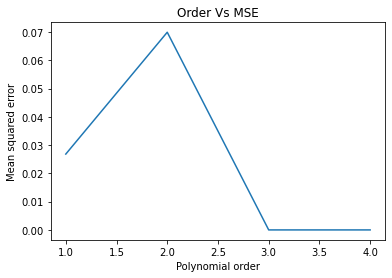

In [42]:
MSE=[]
order=[1,2,3,4]

for i in order:

    Input=[('sclae',StandardScaler()),('Polynomial',PolynomialFeatures(degree=i)),('mode',LinearRegression())]

    pipe=Pipeline(Input)
    pipe.fit(df[['temperature','dissolved oxygen','conductivity','BCOD','nitrate','faecal coliform','total coliform']],df['pH'])
    yhat=pipe.predict(df[['temperature','dissolved oxygen','conductivity','BCOD','nitrate','faecal coliform','total coliform']])
    MSE.append(mean_squared_error(df['pH'],yhat))
    
plt.plot(order,MSE)
plt.xlabel('Polynomial order')
plt.ylabel('Mean squared error')
plt.title('Order Vs MSE')
plt.show()